Bonded Simple Cubic Lattice
============================

This example demonstrates how to construct a lattice with simple cubic unit cells of Tissue Forge objects 
and stimulate it with a periodic external perturbation.

Basic Setup
------------

Begin by initializing Tissue Forge with an explicit timestep and declare a lattice spacing constant by which 
all spatial aspects should be defined. 

In [1]:
import os
import tissue_forge as tf
import numpy as np

tf.init(dt=0.1, dim=[15, 12, 10])

# lattice spacing
a = 0.65

Particle Types
---------------

Declare three particle types to designate roles of particles in the lattice, 

- A basic particle type for particles in the lattice
- A particle type to which an external stimulus is applied
- A particle type that is fixed in space to serve as the base of the lattice

In [2]:
class AType(tf.ParticleTypeSpec):
    """A basic particle type for particles in the lattice"""
    radius = 0.3
    style = {"color": "seagreen"}
    dynamics = tf.Overdamped


A = AType.get()


class BType(tf.ParticleTypeSpec):
    """A particle type to which an external stimulus is applied"""
    radius = 0.3
    style = {"color": "red"}
    dynamics = tf.Overdamped


B = BType.get()


class FixedType(tf.ParticleTypeSpec):
    """A particle type that is fixed in space to serve as the base of the lattice"""
    radius = 0.3
    style = {"color": "blue"}
    frozen = True


Fixed = FixedType.get()

Symmetric Repulsive Interaction
--------------------------------

Particles in the lattice will be bound with their neighbors using bonds. 
Implement a repulsive potential to put some tension in the bonds of the lattice. 

In [3]:
repulse = tf.Potential.coulomb(q=0.08, min=0.01, max=2 * a)

tf.bind.types(repulse, A, A)
tf.bind.types(repulse, A, B)

0

External Stimulus
------------------

Create a periodic force and apply it to the lattice. 

In [4]:
f = tf.CustomForce(lambda: [0.3, 1 * np.sin(0.4 * tf.Universe.time), 0], 0.01)

tf.bind.force(f, B)

0

Lattice Construction
---------------------

Create a lattice of simple cubic unit cells with bonds like Hookean springs. 

In [5]:
pot = tf.Potential.power(r0=0.5 * a, alpha=2, max=10 * a)

uc = tf.lattice.sc(a, A, lambda i, j: tf.Bond.create(pot, i, j, dissociation_energy=100.0))

parts = tf.lattice.create_lattice(uc, [15, 15, 15])

Applying Particle Types
------------------------

Make the right-facing surface of the lattice receive the external stimulus, 
and make the left-facing surface of the lattice be the fixed base. 

In [6]:
for p in parts[14, :].flatten():
    p[0].become(B)

for p in parts[0, :].flatten():
    p[0].become(Fixed)

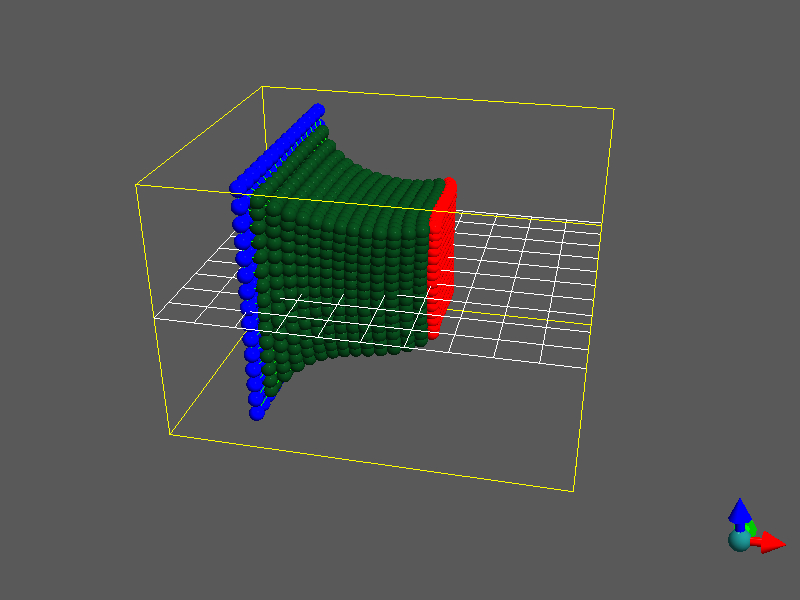

In [7]:
tf.show()